In [1]:
# 회귀
# import keras
import tensorflow as tf
from keras.models import Sequential # models  서브패키지
from keras.layers import Dense # layers => 모델구성
from sklearn.datasets import make_regression
# 신경망 - 정규화
from sklearn.preprocessing import MinMaxScaler
tf.reset_default_graph()
# X : 100x2, y : 100

X, y = make_regression(n_samples=100, n_features=2, noise=0.1, random_state=1)

scalarX, scalarY = MinMaxScaler(), MinMaxScaler() # 데이터의 사이즈(값의 범위)가 달라서 따로 해준다.
scalarX.fit(X)
scalarY.fit(y.reshape(100,1))
X = scalarX.transform(X)
y = scalarY.transform(y.reshape(100,1)) # 행으로 만들기 위해서 reshape

# keras model
# layer depth = 2
# Dense는 FFNN망을 만들기위해 사용
model = Sequential()
# X :100x2,  출력 차수 지정 : 4 => 2x4  => 100x4
model.add(Dense(4,input_dim=2,activation='relu'))
# 100x4, 4x4 => 100x4
model.add(Dense(4, activation='relu'))
# 100x4, 4x1 => 100x1 => 끝이 하나가 나오면 예측이다.
model.add(Dense(1, activation='linear'))

# backend = tensorflow
# 회귀 : mse, 분류 : cross entropy, KL-divergence : 분포를 비교
model.compile(loss='mse', optimizer='adam') # tensorflow 모델을 변환
model.fit(X,y,epochs=1000, verbose=0)

Xnew, a = make_regression(n_samples=3, n_features=2, noise=0.1, random_state=1)

Xnew = scalarX.transform(Xnew)
ynew = model.predict(Xnew)
for i in range(len(Xnew)):
    print('입력데이터 = {}, 예측결과 = {}'.format(Xnew[i], ynew[i]))

Using TensorFlow backend.



입력데이터 = [0.29466096 0.30317302], 예측결과 = [0.17324291]
입력데이터 = [0.39445118 0.79390858], 예측결과 = [0.7445609]
입력데이터 = [0.02884127 0.6208843 ], 예측결과 = [0.4029817]


In [2]:
from keras.models import Sequential # 입력이하나 output도 하나이 망
from keras.layers import Dense
import numpy as np

np.random.seed(7)
dataset = np.loadtxt('pima.data', delimiter=',')

X = dataset[:,0:8] # 8개 독립변수
Y = dataset[:,8] # 종속변수


model = Sequential()
# ?x8, 8x12 => ?x12
#kernel_initializer='uniform' : 초기화 ? 
model.add(Dense(12,input_dim = 8, kernel_initializer='random_normal', activation='relu'))
# ?12x, 12x8 => ?x8
model.add(Dense(8,kernel_initializer='random_normal', activation='relu'))
# ?x8, 8x1 => ?x1 분류 
model.add(Dense(1,kernel_initializer='random_normal', activation='sigmoid')) # 0.5를 기준으로 분류
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# metrics : 내가 보고싶은것, 0 : loss, 1 : accuracy

# 데이터 분리 입력 (train, test) : 과적합
# train, validation, test
history = model.fit(X,Y, validation_split=0.33, epochs=150, batch_size=10)

scores = model.evaluate(X,Y)
# 2번째 accuracy
print('{} : {:.2f}'.format(model.metrics_names[1], scores[1]*100))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 514 samples, validate on 254 samples
Epoch 1/150
514/514 [==============================] - 0s 632us/step - loss: 0.6858 - accuracy: 0.6167 - val_loss: 0.6670 - val_accuracy: 0.6732
Epoch 2/150
514/514 [==============================] - 0s 112us/step - loss: 0.6669 - accuracy: 0.6401 - val_loss: 0.6545 - val_accuracy: 0.6732
Epoch 3/150
514/514 [==============================] - 0s 121us/step - loss: 0.6606 - accuracy: 0.6284 - val_loss: 0.6519 - val_accuracy: 0.6732
Epoch 4/150
514/514 [==============================] - 0s 97us/step - loss: 0.6550 - accuracy: 0.6440 - val_loss: 0.6481 - val_accuracy: 0.6772
Epoch 5/150
514/514 [==============================] - 0s 109us/step - loss: 0.6489 - accuracy: 0.6459 - val_loss: 0.6433 - val_accuracy: 0.6772
Epoch 6/150
514/514 [==============================] - 0s 111us/step - loss: 0.6446 - accuracy: 0.6401 - val_loss: 0.6366 - val_accuracy

514/514 [==============================] - 0s 106us/step - loss: 0.5324 - accuracy: 0.7451 - val_loss: 0.5500 - val_accuracy: 0.7402
Epoch 55/150
514/514 [==============================] - 0s 107us/step - loss: 0.5321 - accuracy: 0.7432 - val_loss: 0.5469 - val_accuracy: 0.7205
Epoch 56/150
514/514 [==============================] - 0s 109us/step - loss: 0.5350 - accuracy: 0.7451 - val_loss: 0.5630 - val_accuracy: 0.7402
Epoch 57/150
514/514 [==============================] - 0s 127us/step - loss: 0.5334 - accuracy: 0.7549 - val_loss: 0.5685 - val_accuracy: 0.7283
Epoch 58/150
514/514 [==============================] - 0s 122us/step - loss: 0.5317 - accuracy: 0.7374 - val_loss: 0.5470 - val_accuracy: 0.7441
Epoch 59/150
514/514 [==============================] - 0s 115us/step - loss: 0.5339 - accuracy: 0.7432 - val_loss: 0.5481 - val_accuracy: 0.7362
Epoch 60/150
514/514 [==============================] - 0s 109us/step - loss: 0.5301 - accuracy: 0.7354 - val_loss: 0.5386 - val_accuracy

514/514 [==============================] - 0s 106us/step - loss: 0.5031 - accuracy: 0.7568 - val_loss: 0.5434 - val_accuracy: 0.7441
Epoch 111/150
514/514 [==============================] - 0s 113us/step - loss: 0.5160 - accuracy: 0.7510 - val_loss: 0.5375 - val_accuracy: 0.7559
Epoch 112/150
514/514 [==============================] - 0s 105us/step - loss: 0.4998 - accuracy: 0.7451 - val_loss: 0.5365 - val_accuracy: 0.7480
Epoch 113/150
514/514 [==============================] - 0s 107us/step - loss: 0.5060 - accuracy: 0.7626 - val_loss: 0.5254 - val_accuracy: 0.7559
Epoch 114/150
514/514 [==============================] - 0s 109us/step - loss: 0.5000 - accuracy: 0.7646 - val_loss: 0.5349 - val_accuracy: 0.7441
Epoch 115/150
514/514 [==============================] - 0s 104us/step - loss: 0.5050 - accuracy: 0.7607 - val_loss: 0.5226 - val_accuracy: 0.7638
Epoch 116/150
514/514 [==============================] - 0s 103us/step - loss: 0.4996 - accuracy: 0.7588 - val_loss: 0.5192 - val_ac

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


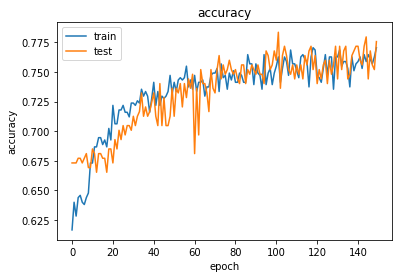

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
print(history.history.keys())
# 'val_loss', 'val_accuracy', 'loss', 'accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


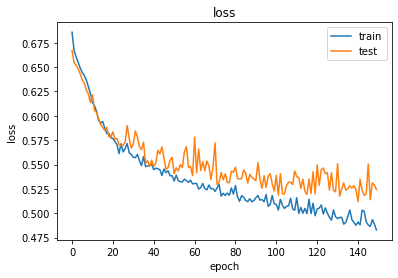

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
print(history.history.keys())
# 'val_loss', 'val_accuracy', 'loss', 'accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [5]:
from sklearn.preprocessing import scale
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X,Y = make_moons(noise = 0.2, random_state=0, n_samples=10000)

X = scale(X)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.5)
print(X.shape)
print(Y.shape)

(10000, 2)
(10000,)


[Text(0, 0.5, 'Y'), Text(0.5, 0, 'X'), Text(0.5, 1.0, 'binary classification')]

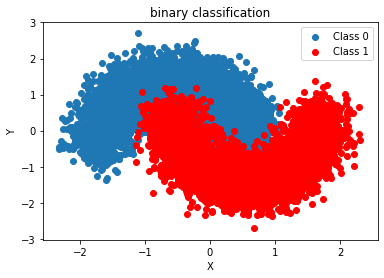

In [6]:
fig, ax =plt.subplots()
ax.scatter(X[Y==0,0], X[Y==0,1], label = 'Class 0')
ax.scatter(X[Y==1,0], X[Y==1,1], color = 'r',label='Class 1')
ax.legend()
ax.set(xlabel='X',ylabel='Y', title='binary classification')

In [7]:
import tensorflow as tf
import keras
tf.reset_default_graph()
# 비선형 모델 - 신경망
model = Sequential()
# 행렬연산 => 설명을 확대(변수 32 - 설명이 잘된다.)
# 1000x2, 2x32 => 1000x32
model.add(Dense(32, input_dim=2,activation='relu'))
# 1000x32, 32x1 => 1000x1
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer = 'AdaDelta', loss='binary_crossentropy', metrics=['accuracy'])

# callback 함수는 window 자동호출 함수
# 이미지 출력 graph
tb_callback = keras.callbacks.TensorBoard(log_dir='./Graph/model_1', histogram_freq=100,write_graph=True, write_images=False)
tb_callback.set_model(model) # 콜백을 모델에 등록

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                96        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 129
Trainable params: 129
Non-trainable params: 0
_________________________________________________________________


In [9]:
hist = model.fit(X_train, Y_train, batch_size = 32, epochs=200, verbose=0, validation_data =(X_test,Y_test), callbacks=[tb_callback])


In [10]:
score = model.evaluate(X_test, Y_test,verbose=0)
print('Test loss : ', score[0])
print('Test accuracy : ', score[1])

Test loss :  0.07413437032103538
Test accuracy :  0.972000002861023


In [11]:
keras.utils.print_summary(model)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                96        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 129
Trainable params: 129
Non-trainable params: 0
_________________________________________________________________


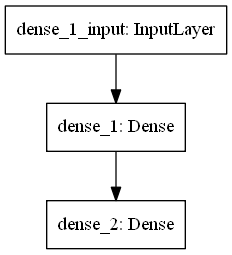

In [12]:
keras.utils.plot_model(model)

In [13]:
%matplotlib inline
from keras.utils.vis_utils import model_to_dot
model_to_dot(model)

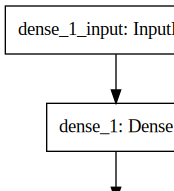

In [14]:
from IPython.display import Image, SVG
SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                96        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 129
Trainable params: 129
Non-trainable params: 0
_________________________________________________________________


In [16]:
from  keras.datasets import mnist
import matplotlib.pylab as plt
(X_train0, y_train0), (X_test0, y_test0) = mnist.load_data()
print(X_train0.shape, X_train0.dtype)
print(X_test0.shape, X_test0.dtype)
print(y_train0.shape, y_train0.dtype)
print(y_test0.shape, y_test0.dtype)


(60000, 28, 28) uint8
(10000, 28, 28) uint8
(60000,) uint8
(10000,) uint8


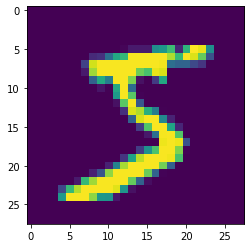

In [17]:
plt.imshow(X_train0[0])
plt.grid(False)
plt.show()

In [18]:
# fully-connected : flatten : FFNN은 데이터가 한줄로 서서 들어간다.
X_train = X_train0.reshape(60000, 784).astype('float32') / 255.0
X_test = X_test0.reshape(10000,784).astype('float32')/255.0
print(X_train.shape, X_train.dtype)

(60000, 784) float32


In [19]:
y_train0[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [20]:
from keras.utils import np_utils
Y_train = np_utils.to_categorical(y_train0,10)
Y_test = np_utils.to_categorical(y_test0,10)
Y_train[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [21]:
import numpy as np
from keras.optimizers import SGD
np.random.seed(0)
model = Sequential()
model.add(Dense(15, input_dim=784, activation = 'sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.compile(optimizer=SGD(lr=0.2), loss='mean_squared_error', metrics = ['accuracy'])

In [22]:
model.layers

In [23]:

l1 = model.layers[0]
l2 = model.layers[1]
# 레이어 속성으로 정보 확인
l1.name
l1.input_shape
l1.activation

<function keras.activations.sigmoid(x)>

C:\Users\ICT01_10\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 60000 samples, validate on 10000 samples
Epoch 1/30
 - 1s - loss: 0.1019 - accuracy: 0.2440 - val_loss: 0.0864 - val_accuracy: 0.3212
Epoch 2/30
 - 1s - loss: 0.0845 - accuracy: 0.3921 - val_loss: 0.0821 - val_accuracy: 0.4409
Epoch 3/30
 - 1s - loss: 0.0796 - accuracy: 0.4997 - val_loss: 0.0765 - val_accuracy: 0.5340
Epoch 4/30
 - 1s - loss: 0.0740 - accuracy: 0.5620 - val_loss: 0.0707 - val_accuracy: 0.5852
Epoch 5/30
 - 1s - loss: 0.0682 - accuracy: 0.6149 - val_loss: 0.0649 - val_accuracy: 0.6522
Epoch 6/30
 - 1s - loss: 0.0625 - accuracy: 0.6759 - val_loss: 0.0594 - val_accuracy: 0.6998
Epoch 7/30
 - 1s - loss: 0.0576 - accuracy: 0.7101 - val_loss: 0.0551 - val_accuracy: 0.7316
Epoch 8/30
 - 1s - loss: 0.0537 - accuracy: 0.7325 - val_loss: 0.0516 - val_accuracy: 0.7485
Epoch 9/30
 - 1s - loss: 0.0505 - accuracy: 0.7474 - val_loss: 0.0486 - val_accuracy: 0.7639
Epoch 10/30
 - 1s - loss: 0.0478 - accuracy: 0.7609 - val_loss: 0.0461 - val_accuracy: 0.7759
Epoch 11/30
 - 1s -

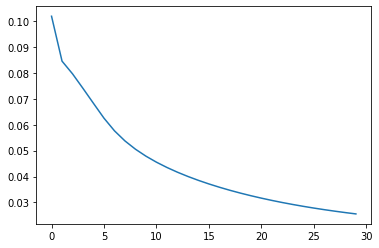

In [25]:

hist = model.fit(X_train, Y_train, nb_epoch=30, batch_size=100, validation_data=(X_test, Y_test), verbose=2)

plt.plot(hist.history['loss'])
plt.show()

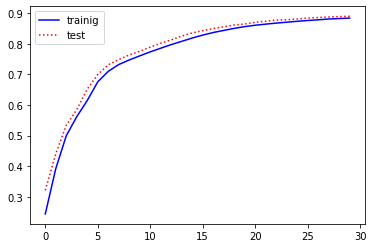

{'batch_size': 100, 'epochs': 30, 'steps': None, 'samples': 60000, 'verbose': 2, 'do_validation': True, 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy']}
[0.24401666, 0.39213333, 0.49971667, 0.56201667, 0.6149167, 0.6759167, 0.7101333, 0.7325, 0.7474167, 0.76085, 0.77395, 0.7858833, 0.79766667, 0.8082833, 0.81918335, 0.82878333, 0.83713335, 0.84403336, 0.8506333, 0.85646665, 0.8609667, 0.8646167, 0.86795, 0.87091666, 0.87381667, 0.87651664, 0.8786833, 0.88136667, 0.8829, 0.8844]
{'val_loss': [0.08644600212574005, 0.08205005668103695, 0.07654464691877365, 0.07074860535562039, 0.06485860958695412, 0.059424911960959434, 0.05506921458989382, 0.05155788816511631, 0.04861875843256712, 0.046099744513630865, 0.043904951326549056, 0.04195264371111989, 0.040192772652953866, 0.038578768987208606, 0.037113306503742935, 0.035759844500571486, 0.03452287472784519, 0.03337498551234603, 0.03230768712237477, 0.0313104984536767, 0.030401214193552732, 0.029542458634823562, 0.028746553026139737,

In [26]:
plt.plot(hist.history['accuracy'], 'b-', label='trainig')
plt.plot(hist.history['val_accuracy'], 'r:', label='test')
plt.legend()
plt.show()

print(hist.model)
print(hist.params)
print(hist.history['accuracy'])
print(hist.history)

In [27]:
# Callback class
# custom callback 함수의 제작
# callback은 함수에 의해서 호출되는 객체
class CustomHistory(keras.callbacks.Callback): # 상속받음
    def init(self):
        self.train_loss = []
        self.val_loss = []
        self.train_acc=[]
        self.val_acc = []
    def on_epoch_end(self, batch, logs={}): # 오버라이딩
        self.train_loss.append(logs.get('loss'))
        self.val_loss.append(logs.get('val_loss'))
        self.train_acc.append(logs.get('acc'))
        self.val_acc.append(logs.get('val_acc'))

In [28]:
from keras.datasets import mnist